<a href="https://colab.research.google.com/github/chryssa-pat/Decision-Theory/blob/main/Google_class_A_stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
desired_directory = '/content/drive/MyDrive/alphavantage'
os.chdir(desired_directory)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Συλλογή Δεδομένων**




In [ ]:
import requests

#API_KEY = WUANR0CI7QBROL0X
#STOCK SYMBOL = GOOGL
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=GOOGL&outputsize=full&apikey=WUANR0CI7QBROL0X'   # replace API KEY and stock symbol
r = requests.get(url)
data = r.json()


In [ ]:
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Extract "Time Series (Daily)" part
time_series = data.get("Time Series (Daily)", {})

# Prepare data for CSV
csv_data = [("Date", "Close")]  # Header for CSV file

# Loop through each date and get the "close" price
for date, daily_data in time_series.items():
    close_price = daily_data.get("4. close", None)
    if close_price:
        csv_data.append((date, close_price))

# Write data to CSV file
csv_file = '/content/drive/MyDrive/alphavantage/close_prices.csv'
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(csv_data)

print(f"Data saved to {csv_file}")



Data saved to /content/drive/MyDrive/alphavantage/close_prices.csv


# **Προεπεξεργασία**




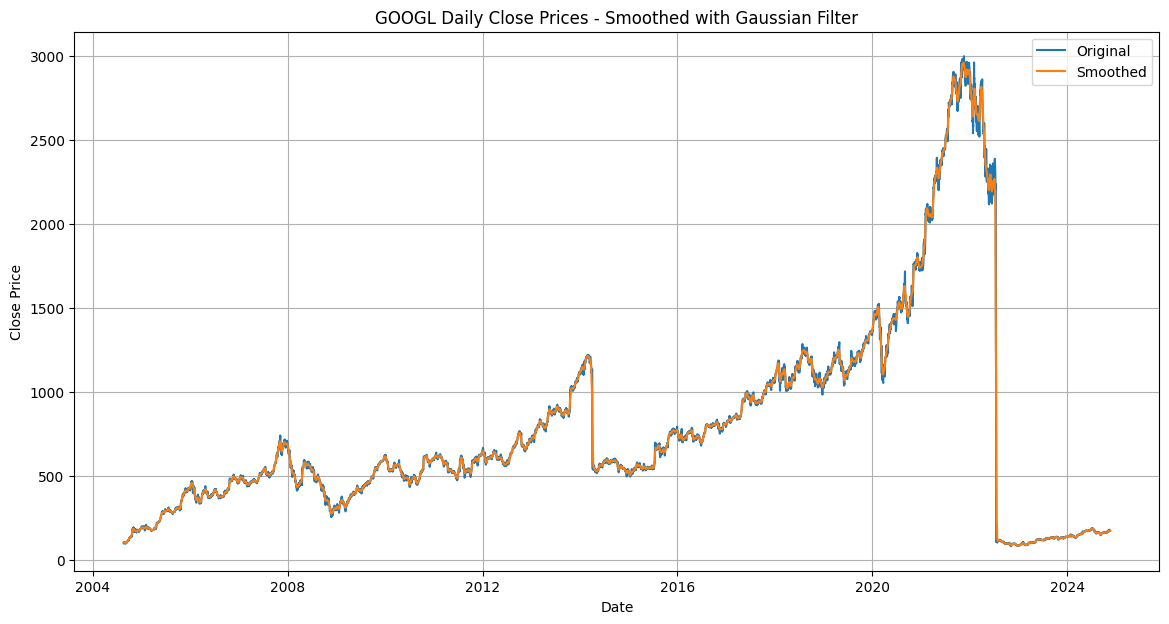

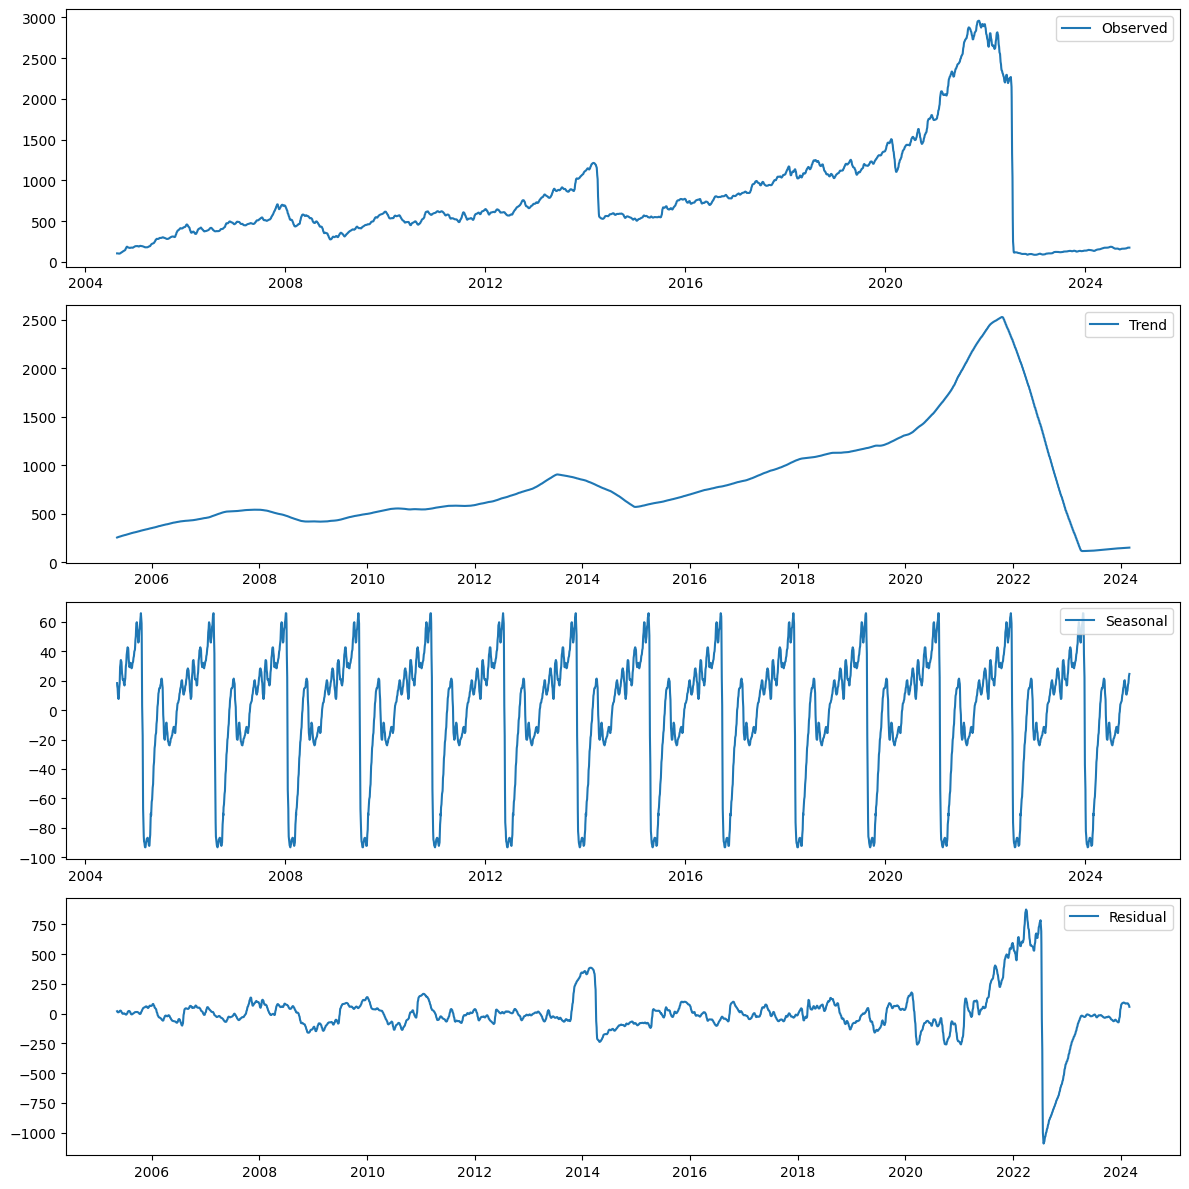

In [ ]:
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/alphavantage/close_prices.csv')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Apply Gaussian filter
df['Close_smoothed'] = gaussian_filter1d(df['Close'], sigma=3)

# Plot the original and smoothed data
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Original')
plt.plot(df['Close_smoothed'], label='Smoothed')
plt.title('GOOGL Daily Close Prices - Smoothed with Gaussian Filter')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()


# Perform seasonal decomposition
decomposition = seasonal_decompose(df['Close_smoothed'], model='additive', period=365)

# Plot the decomposed components
fig, axes = plt.subplots(4, 1, figsize=(12, 12))
axes[0].plot(decomposition.observed, label='Observed')
axes[0].legend()
axes[1].plot(decomposition.trend, label='Trend')
axes[1].legend()
axes[2].plot(decomposition.seasonal, label='Seasonal')
axes[2].legend()
axes[3].plot(decomposition.resid, label='Residual')
axes[3].legend()
plt.tight_layout()
plt.show()

Παρατηρήσεις απο την πρώτη γραφική:

1.	Μέχρι το 2020 οι τιμές κλεισίματος εμφανίζουν διακυμάνσεις, αλλά και  μια   σταθερή ανοδική τάση.
2.	Περίπου το 2021 παρατηρείται απότομη άνοδος της μετοχής.
3.	Τέλος, στα μέσα του 2022 υπάρχει ξαφνική πτώση της μετοχής, η οποία στην συνέχεια σταθεροποιείται σε πολύ χαμηλές τιμές με ελάχιστες διακυμάνσεις σε σύγκριση με τις προηγούμενες περιόδους.












<Figure size 1400x700 with 0 Axes>

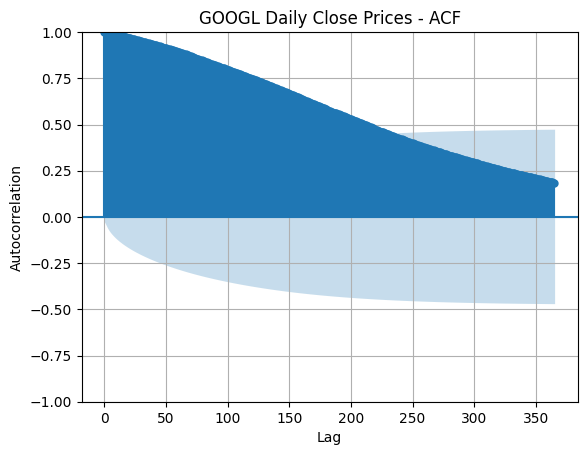

In [ ]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/alphavantage/close_prices.csv')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Apply Gaussian filter
df['Close_smoothed'] = gaussian_filter1d(df['Close'], sigma=3)

# Create the ACF plot
plt.figure(figsize=(14, 7))
plot_acf(df['Close_smoothed'], lags=365)
plt.title('GOOGL Daily Close Prices - ACF')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

Η συγκεκριμένη γραφική δείχνει τη συνάρτηση αυτοσυσχέτισης (ACF) για τις ημερήσιες τιμές κλεισίματος της μετοχής Google (GOOGL):


1.	Η ACF ξεκινά κοντά στο 1 στο lag 0, υποδεικνύοντας ισχυρή αυτοσυσχέτιση στην αρχή, κάτι που είναι αναμενόμενο, καθώς μια χρονοσειρά συσχετίζεται πάντα τέλεια με τον εαυτό της. Για μικρές τιμές εξακολουθεί να υπάρχει ισχυρή συσχέτιση.
2.	Καθώς αυξάνουμε τα lag , η αυτοσυσχέτιση μειώνεται σταδιακά. Αυτό υποδηλώνει ότι οι ημερήσιες τιμές κλεισίματος της μετοχής της Google συσχετίζονται σε μεγάλο βαθμό σε μικρά χρονικά διαστήματα.
3.	Η ACF φθίνει σταδιακά, μέχρι  να πλησιάσει  σχεδόν το μηδέν. Αυτό δείχνει ότι σε μαγαλύτερα χρονικά διαστήματα η συσχέτιση μεταξύ των τιμών μειώνεται.



In [ ]:
df

,Close,Close_smoothed
Date,,
2024-11-18,175.300,176.137720
2024-11-15,172.490,176.389924
2024-11-14,175.580,176.805351
2024-11-13,178.880,177.229916
2024-11-12,181.620,177.487574
...,...,...
2004-08-25,106.000,105.364413
2004-08-24,104.870,105.589222
2004-08-23,109.400,105.649125



--- Lags: 1 ---
Validation MSE: 0.5666315131761408
Validation RMSE: 0.752749303006081
Validation MAE: 0.6214900491711689
Linear Regression Equation:
y = 0.1503 + (0.9998) * close_t-1
Predicted vs Actual Close Prices:


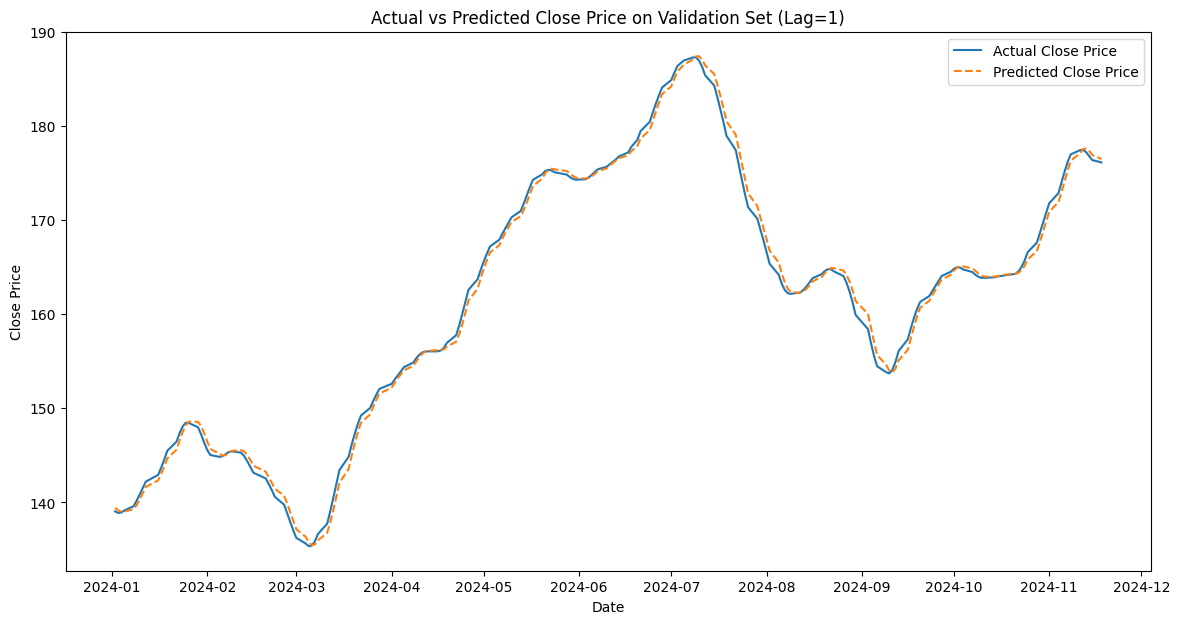


--- Lags: 2 ---
Validation MSE: 0.07001488312958021
Validation RMSE: 0.2646032560827251
Validation MAE: 0.22767450429252373
Linear Regression Equation:
y = 0.2630 + (1.9718) * close_t-1 + (-0.9721) * close_t-2
Predicted vs Actual Close Prices:


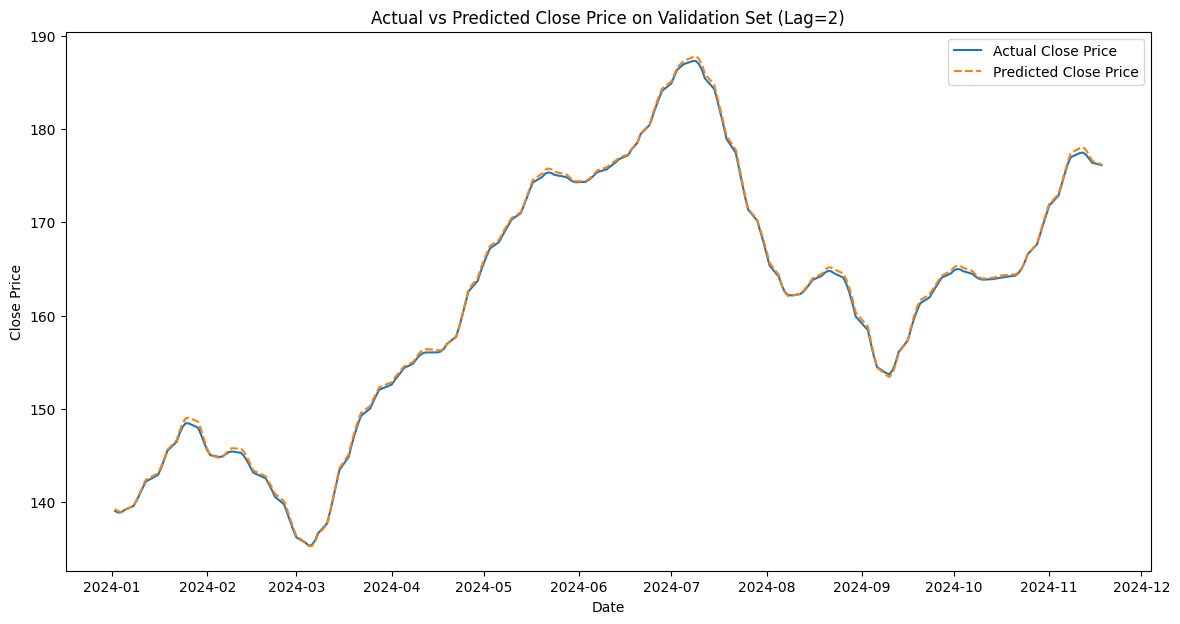


--- Lags: 3 ---
Validation MSE: 0.0033390303557124463
Validation RMSE: 0.057784343517188516
Validation MAE: 0.047518220172827925
Linear Regression Equation:
y = 0.0149 + (2.8924) * close_t-1 + (-2.8394) * close_t-2 + (0.9470) * close_t-3
Predicted vs Actual Close Prices:


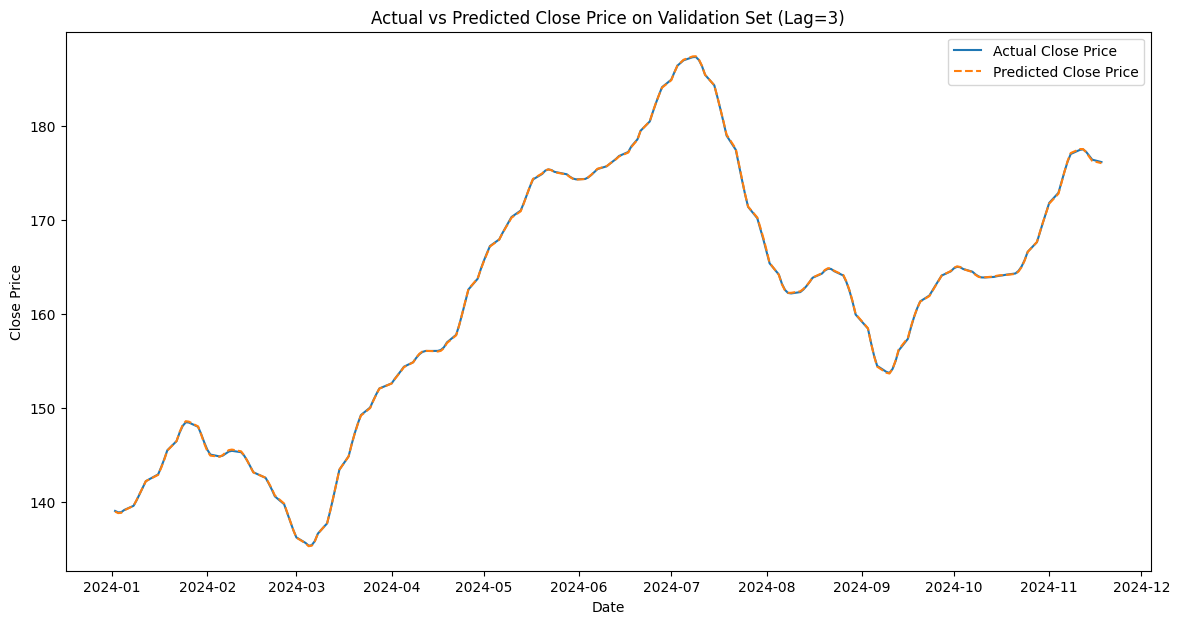


--- Lags: 4 ---
Validation MSE: 0.0010647297112459037
Validation RMSE: 0.03263019631025691
Validation MAE: 0.025952780376092346
Linear Regression Equation:
y = 0.0270 + (3.7691) * close_t-1 + (-5.4679) * close_t-2 + (3.6246) * close_t-3 + (-0.9258) * close_t-4
Predicted vs Actual Close Prices:


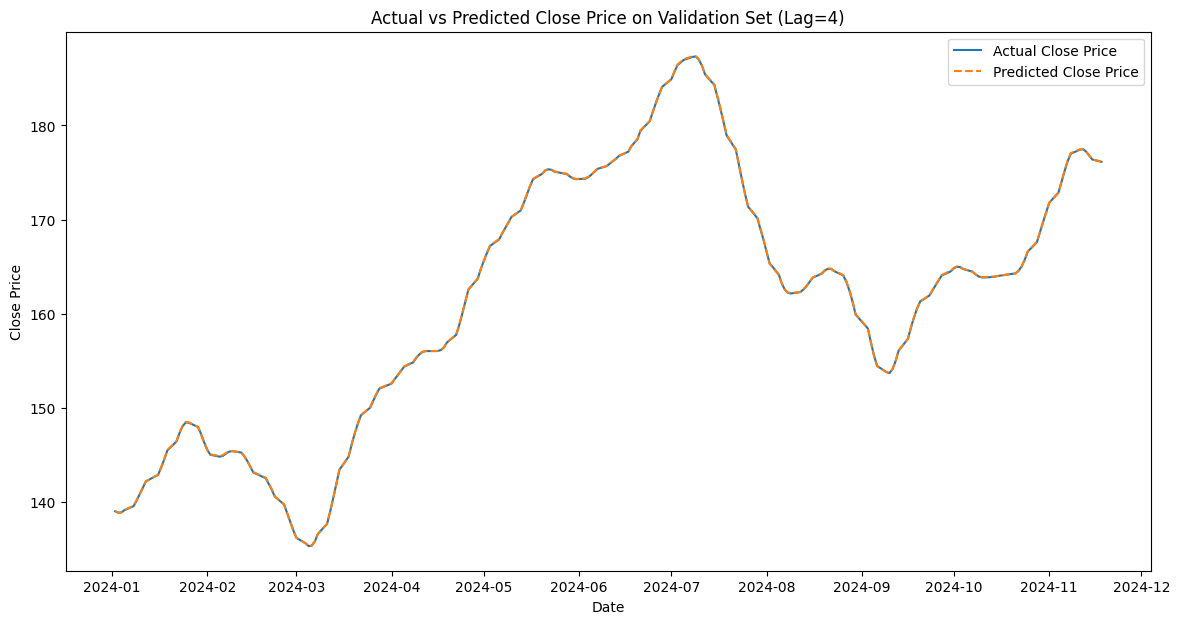


--- Lags: 5 ---
Validation MSE: 0.00012727938875162526
Validation RMSE: 0.011281816730989085
Validation MAE: 0.008702405654676261
Linear Regression Equation:
y = 0.0028 + (4.6010) * close_t-1 + (-8.7254) * close_t-2 + (8.5387) * close_t-3 + (-4.3130) * close_t-4 + (0.8987) * close_t-5
Predicted vs Actual Close Prices:


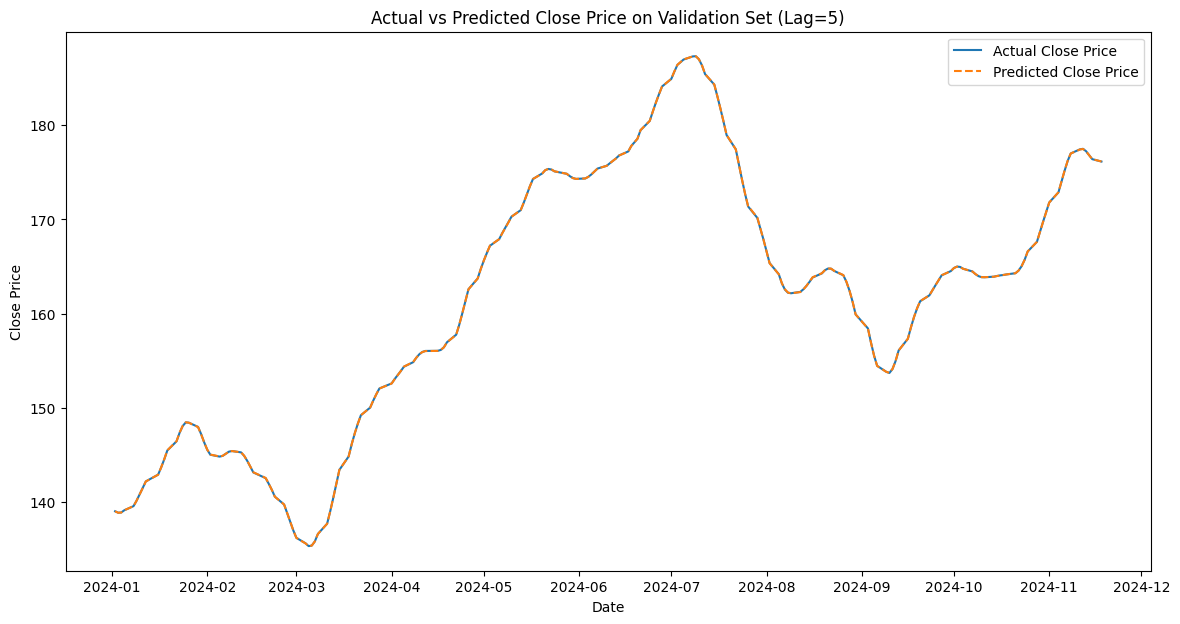


--- Lags: 6 ---
Validation MSE: 4.802709161302625e-05
Validation RMSE: 0.006930158123234003
Validation MAE: 0.005631972981872562
Linear Regression Equation:
y = 0.0051 + (5.3739) * close_t-1 + (-12.4343) * close_t-2 + (15.8813) * close_t-3 + (-11.8161) * close_t-4 + (4.8552) * close_t-5 + (-0.8599) * close_t-6
Predicted vs Actual Close Prices:


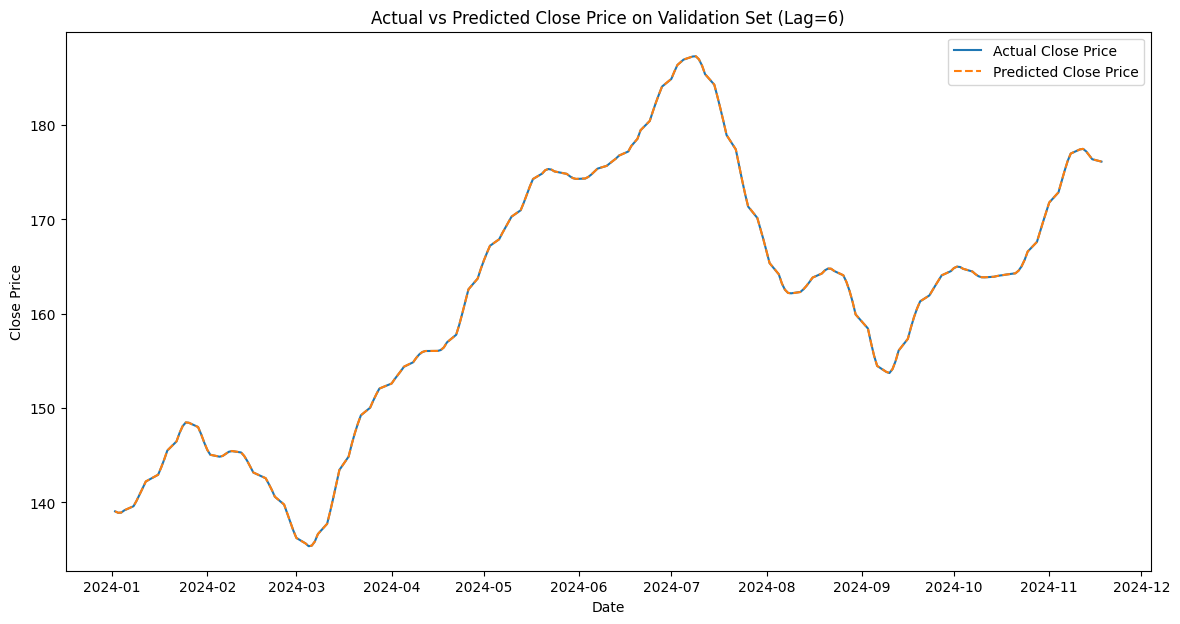


--- Lags: 7 ---
Validation MSE: 1.1074152482270945e-05
Validation RMSE: 0.0033277849212758545
Validation MAE: 0.0026303942805102217
Linear Regression Equation:
y = 0.0009 + (6.0863) * close_t-1 + (-16.4568) * close_t-2 + (25.6710) * close_t-3 + (-24.9738) * close_t-4 + (15.1569) * close_t-5 + (-5.3121) * close_t-6 + (0.8285) * close_t-7
Predicted vs Actual Close Prices:


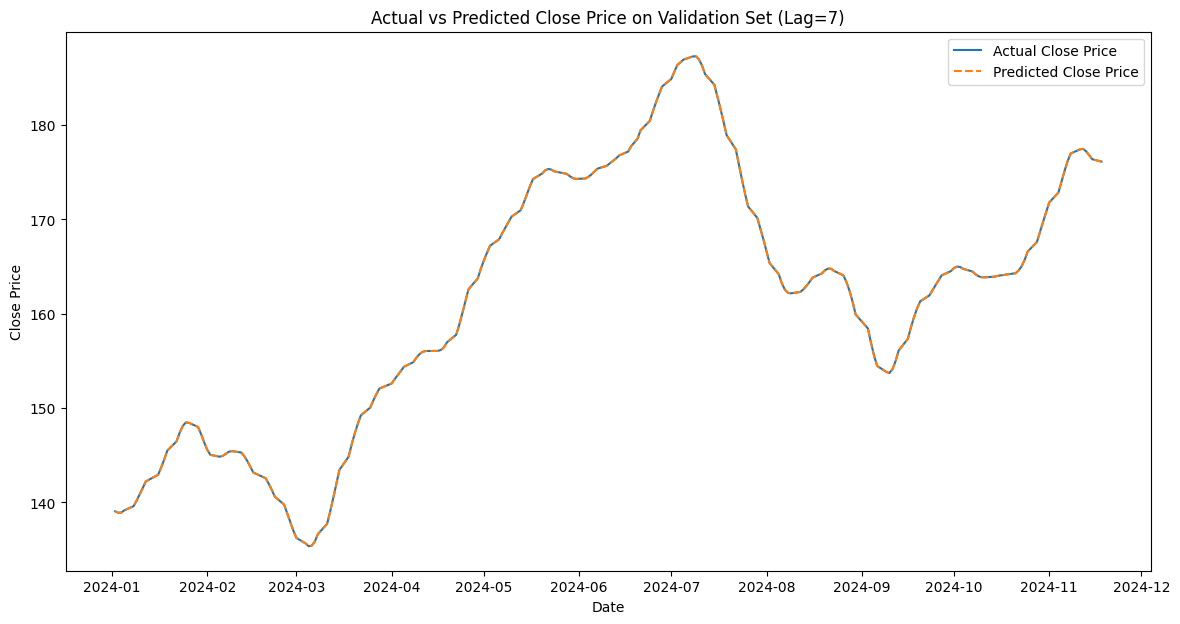

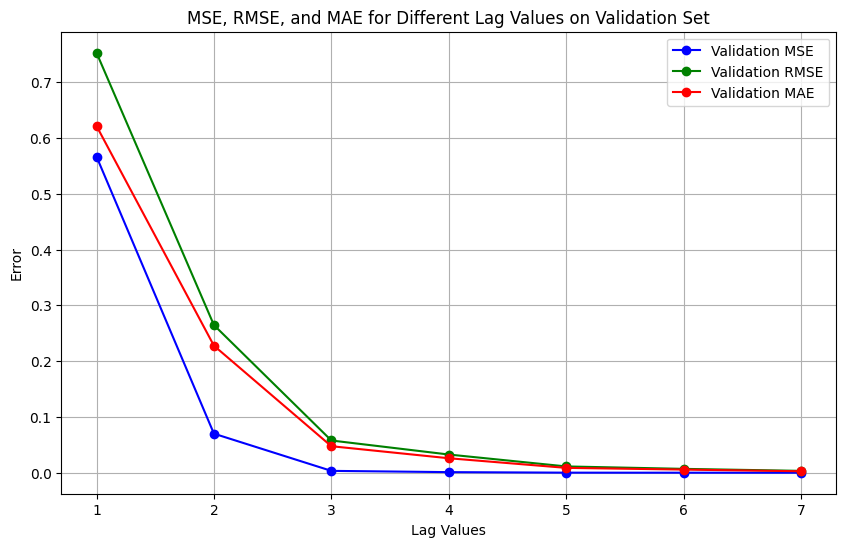

In [ ]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import joblib

#  Load the data
df = pd.read_csv('/content/drive/MyDrive/alphavantage/close_prices.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index()

#  Apply Gaussian Smoothing
sigma = 3
df['Close_smoothed'] = gaussian_filter1d(df['Close'], sigma=sigma)

#  List to store results
results_list = []

# Loop through lag values from 1 to 7
for lags in range(1, 8):
    # Add lagged features to the DataFrame
    for i in range(1, lags + 1):
        df[f'close_t-{i}'] = df['Close_smoothed'].shift(i)

    df = df.dropna()  # Drop any rows with NaN values after creating lags

    # Split into training and validation sets
    train_data = df[df.index < '2024-01-01']
    validation_data = df[df.index >= '2024-01-01']
    #print(validation_data)

    #  x: train, y:validation
    X_train = train_data[[f'close_t-{i}' for i in range(1, lags + 1)]].values
    y_train = train_data['Close_smoothed'].values
    X_validation = validation_data[[f'close_t-{i}' for i in range(1, lags + 1)]].values
    y_validation = validation_data['Close_smoothed'].values

    #  Train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the validation set
    validation_predictions = model.predict(X_validation)

    # Evaluate the model
    validation_mse = mean_squared_error(y_validation, validation_predictions)
    validation_rmse = np.sqrt(mean_squared_error(y_validation, validation_predictions))
    validation_mae = mean_absolute_error(y_validation, validation_predictions)

    # Store results
    results_list.append({
        'lags': lags,
        'validation_mse': validation_mse,
        'validation_rmse': validation_rmse,
        'validation_mae': validation_mae,
        'coefficients': model.coef_,
        'intercept': model.intercept_,
        'predictions': validation_predictions.flatten(),
        'actual': y_validation.flatten(),
        'dates': validation_data.index
    })

    # Store the model for lag 4
    if lags == 4:
        best_model = model
        joblib.dump(best_model, '/content/drive/MyDrive/alphavantage/linear_regression_model.pkl')

    # coefficients and intercept
    coefficients = model.coef_
    intercept = model.intercept_

    # Create the linear equation
    linear_terms = [f'({coeff:.4f}) * close_t-{i}' for i, coeff in enumerate(coefficients, start=1)]
    linear_equation = f'y = {intercept:.4f} + ' + ' + '.join(linear_terms)
    print(f"\n--- Lags: {lags} ---")
    print(f"Validation MSE: {validation_mse}")
    print(f"Validation RMSE: {validation_rmse}")
    print(f"Validation MAE: {validation_mae}")
    print("Linear Regression Equation:")
    print(linear_equation)

    # Create a DataFrame with Date, Actual, and Predicted values
    results_df = pd.DataFrame({
        'Date': validation_data.index,
        'Actual Close Price': y_validation.flatten(),
        'Predicted Close Price': validation_predictions.flatten()
    })

    # Print the results DataFrame
    print("Predicted vs Actual Close Prices:")
    #print(results_df.head())

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(validation_data.index, y_validation, label='Actual Close Price')
    plt.plot(validation_data.index, validation_predictions, label='Predicted Close Price', linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Actual vs Predicted Close Price on Validation Set (Lag={lags})')
    plt.legend()
    plt.show()

# Extract the metrics for different lags
mse_values = [result['validation_mse'] for result in results_list]
rmse_values = [result['validation_rmse'] for result in results_list]
mae_values = [result['validation_mae'] for result in results_list]
lag_values = [result['lags'] for result in results_list]

# Plot MSE, RMSE, and MAE in the same graph
plt.figure(figsize=(10, 6))
plt.plot(lag_values, mse_values, marker='o', linestyle='-', color='b', label='Validation MSE')
plt.plot(lag_values, rmse_values, marker='o', linestyle='-', color='g', label='Validation RMSE')
plt.plot(lag_values, mae_values, marker='o', linestyle='-', color='r', label='Validation MAE')

plt.xlabel('Lag Values')
plt.ylabel('Error') # y-axis: error
plt.title('MSE, RMSE, and MAE for Different Lag Values on Validation Set')
plt.xticks(lag_values)  # x-axis: lag values
plt.legend()
plt.grid(True)
plt.show()


Με βάση το γράφημα, φαίνεται ότι οι μετρικές σφάλματος (MSE, RMSE και MAE) μειώνονται σημαντικά από το lag 1 έως το lag 2 και στη συνέχεια φθάνουν σε χαμηλές και σταθερές τιμές από το lag 3 και μετά. Μέχρι το lag 4, τα σφάλματα έχουν φθάσει σε  σταθερή κατάσταση, γεγονός που υποδηλώνει ότι τα πρόσθετα lag  πέραν αυτού του σημείου δεν παρέχουν ουσιαστική βελτίωση της ακρίβειας. Οπότε γι'αυτό και θα χρησιμοποιηθεί το μοντέλο που έχει δημιουργηθεί με τα 4 lag.


In [ ]:
# Load the model with lag = 4
best_model = joblib.load('/content/drive/MyDrive/alphavantage/linear_regression_model.pkl')

#  Get the most recent 4 smoothed values for creating lag features
recent_data = df['Close_smoothed'].iloc[-4:].values

# Reshape the data to fit the model's expected input shape
next_day_features = recent_data.reshape(1, -1)

#  Make the prediction for the next day
next_day_prediction = best_model.predict(next_day_features)

print(f"Predicted Close Price for the next day: {next_day_prediction[0]:.2f}")



Predicted Close Price for the next day: 177.54


# **ΕΡΩΤΗΜΑ 2**





--- Lags: 1, Degree: 1, Best Alpha: 100 ---
Validation MSE: 0.5811756228348759
Validation RMSE: 0.7623487540718329
Validation MAE: 0.6061288538631436

--- Lags: 1, Degree: 2, Best Alpha: 1 ---
Validation MSE: 0.5665234515535068
Validation RMSE: 0.752677521620984
Validation MAE: 0.6213281940066154

--- Lags: 1, Degree: 3, Best Alpha: 1 ---
Validation MSE: 0.5660877012056418
Validation RMSE: 0.7523879991105931
Validation MAE: 0.6202189648372755

--- Lags: 1, Degree: 4, Best Alpha: 0.01 ---
Validation MSE: 0.5684617442112696
Validation RMSE: 0.7539640205018205
Validation MAE: 0.6237505721980302

--- Lags: 1, Degree: 5, Best Alpha: 0.01 ---
Validation MSE: 0.570507001335361
Validation RMSE: 0.7553191387323381
Validation MAE: 0.626072647103375

--- Lags: 2, Degree: 1, Best Alpha: 0.01 ---
Validation MSE: 0.18252015557722934
Validation RMSE: 0.4272237769333881
Validation MAE: 0.3243994667674771

--- Lags: 2, Degree: 2, Best Alpha: 0.01 ---
Validation MSE: 0.2647636943772159
Validation RMSE:

<ipython-input-4-acef21f34e95>:104: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', num_degrees)


<Figure size 1400x1000 with 0 Axes>

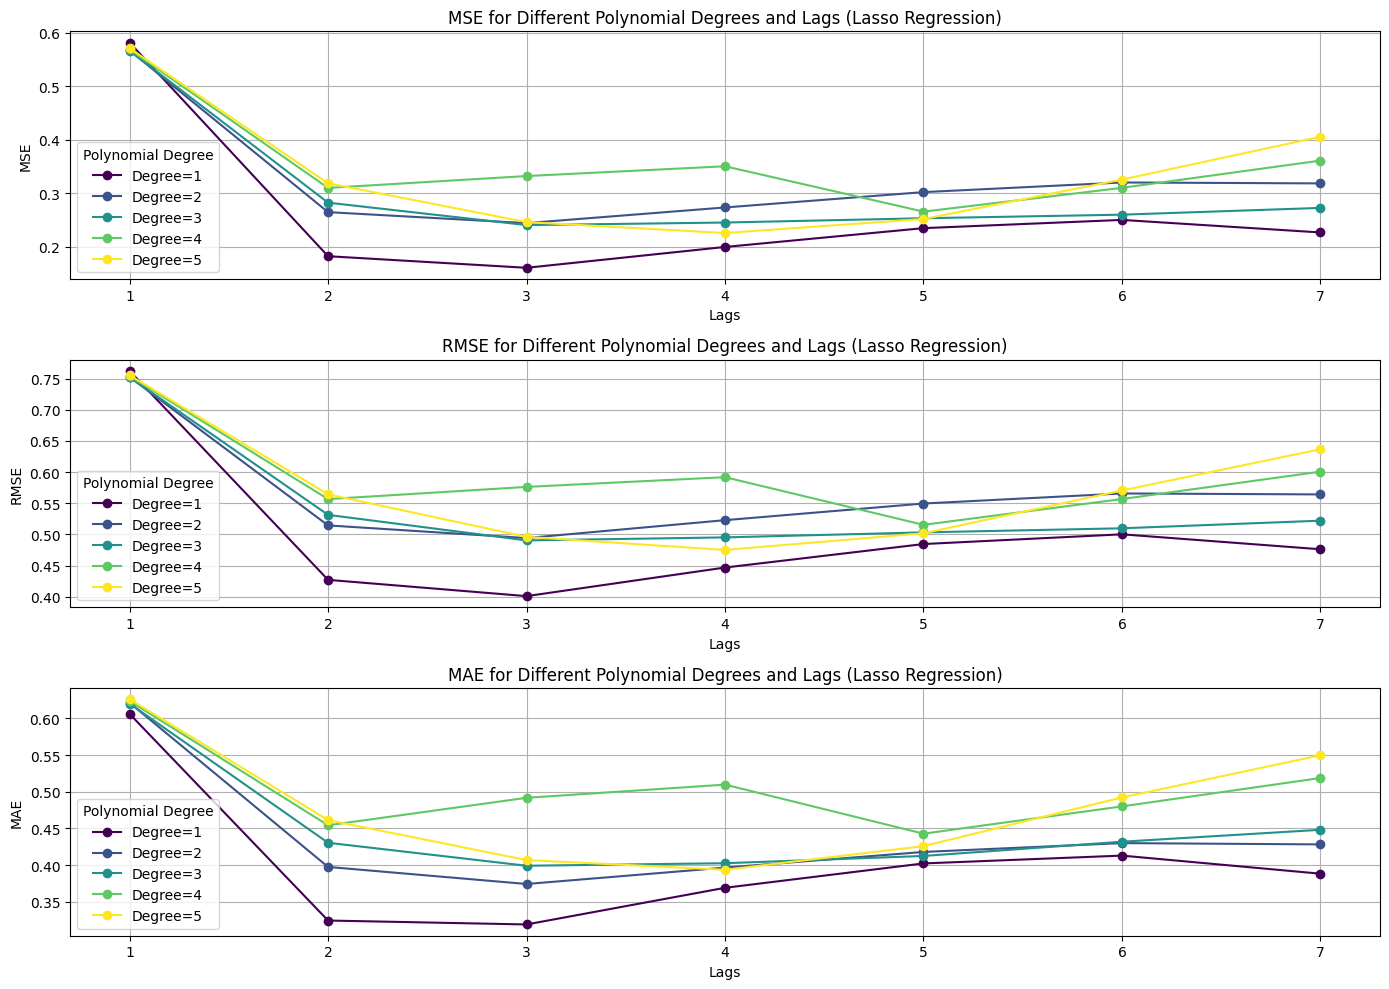

In [ ]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import GridSearchCV
import joblib

# Load the data
df = pd.read_csv('/content/drive/MyDrive/alphavantage/close_prices.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index()

#  Apply Gaussian Smoothing
sigma = 3
df['Close_smoothed'] = gaussian_filter1d(df['Close'], sigma=sigma)

# Define the range of alpha values for GridSearchCV
alpha_values = [0.01, 0.1, 1, 10, 100]

#  Prepare to store results
results_list = []

# Loop through lag values from 1 to 7
for lags in range(1, 8):
    for i in range(1, lags + 1):
        df[f'close_t-{i}'] = df['Close_smoothed'].shift(i)

    df = df.dropna()

    # Split into training and validation sets
    train_data = df[df.index < '2024-01-01']
    validation_data = df[df.index >= '2024-01-01']

    # x: train, y:validation
    X_train = train_data[[f'close_t-{i}' for i in range(1, lags + 1)]].values
    y_train = train_data['Close_smoothed'].values
    X_validation = validation_data[[f'close_t-{i}' for i in range(1, lags + 1)]].values
    y_validation = validation_data['Close_smoothed'].values

    # Loop through polynomial degrees from 1 to 5
    for degree in range(1, 6):
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_validation_poly = poly.transform(X_validation)

        lasso = Lasso(max_iter=10000)
        param_grid = {'alpha': alpha_values}
        grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_poly, y_train)

        # Get the best alpha
        best_alpha = grid_search.best_params_['alpha']

        # Train the final model with the best alpha
        best_model = Lasso(alpha=best_alpha, max_iter=10000)
        best_model.fit(X_train_poly, y_train)

        # Make predictions on the validation set
        validation_predictions = best_model.predict(X_validation_poly)

        #  Evaluate the model
        validation_mse = mean_squared_error(y_validation, validation_predictions)
        validation_rmse = np.sqrt(validation_mse)
        validation_mae = mean_absolute_error(y_validation, validation_predictions)

        # Store results
        results_list.append({
            'lags': lags,
            'degree': degree,
            'validation_mse': validation_mse,
            'validation_rmse': validation_rmse,
            'validation_mae': validation_mae
        })

        print(f"\n--- Lags: {lags}, Degree: {degree}, Best Alpha: {best_alpha} ---")
        print(f"Validation MSE: {validation_mse}")
        print(f"Validation RMSE: {validation_rmse}")
        print(f"Validation MAE: {validation_mae}")

        # Save the model
        if lags == 3 and degree == 3:
            joblib.dump(best_model, '/content/drive/MyDrive/alphavantage/lasso_model.pkl')



results_df = pd.DataFrame(results_list)

# Plot the metrics (MSE, RMSE, MAE) for different lags and polynomial Degrees
plt.figure(figsize=(14, 10))

# Plot for MSE, RMSE, and MAE with lags on the x-axis
metrics = ['validation_mse', 'validation_rmse', 'validation_mae']
metric_labels = ['MSE', 'RMSE', 'MAE']

# Determine the number of polynomial degrees dynamically
unique_degrees = results_df['degree'].unique()
num_degrees = len(unique_degrees)

# Generate a colormap
colormap = cm.get_cmap('viridis', num_degrees)

plt.figure(figsize=(14, 10))

for idx, metric in enumerate(metrics):
    plt.subplot(3, 1, idx + 1)  # Create subplots for each metric
    for degree_idx, degree in enumerate(unique_degrees):
        degree_df = results_df[results_df['degree'] == degree]
        color = colormap(degree_idx / num_degrees)
        plt.plot(degree_df['lags'], degree_df[metric],
                 marker='o', linestyle='-', color=color,
                 label=f'Degree={degree}')
    plt.xlabel('Lags')
    plt.ylabel(metric_labels[idx])
    plt.title(f'{metric_labels[idx]} for Different Polynomial Degrees and Lags (Lasso Regression)')
    plt.legend(title="Polynomial Degree")
    plt.grid(True)

plt.tight_layout()
plt.show()


Με βάση τα γραφήματα, φαίνεται ότι οι μετρικές σφάλματος (MSE, RMSE και MAE) μειώνονται σημαντικά από το lag 1 έως το lag 2 και στη συνέχεια φθάνουν σε χαμηλή τιμή για lag = 3, αυτό δείχνει την ικανότητα του μοντέλου να εκμεταλλεύεται χρήσιμες πληροφορίες από παρελθοντικά δεδομένα χωρίς να κάνει overfitting. Για τους βαθμούς 1,2,4,5 για μεγαλύτερο πλήθος lag αυξάνεται το σφάλμα λόγω οverfitting.  Οπότε ο καταλληλότερος συνδυασμός είναι lag=3 , degree=3, καθώς έχει ένα από τα χαμηλότερα MSE και προσφέρει το βέλτιστο σημείο ισορροπίας μεταξύ ακρίβειας πρόβλεψης, γενίκευσης (επιτρέπει την καταγραφή μη γραμμικών σχέσεων) και πολυπλοκότητας.

In [ ]:
import joblib
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Load the saved model
lasso_model = joblib.load('/content/drive/MyDrive/alphavantage/lasso_model.pkl')

#  Prepare the features for prediction
recent_values = df['Close_smoothed'].iloc[-3:].values

# Create a vector for the input features
input_features = recent_values.reshape(1, -1)

# Transform the input features into Polynomial Features
poly = PolynomialFeatures(degree=3)
input_poly = poly.fit_transform(input_features)

# Make the prediction
next_day_prediction = lasso_model.predict(input_poly)

# Print the prediction for the next day
print("Prediction for the next day:", next_day_prediction[0])


Prediction for the next day: 177.07874003730063



--- Lags: 1, Degree: 1, Best Alpha: 100 ---
Validation MSE: 0.5666283199034802
Validation RMSE: 0.7527471819299493
Validation MAE: 0.6214844799800088

--- Lags: 1, Degree: 2, Best Alpha: 0.01 ---
Validation MSE: 0.5650659071708881
Validation RMSE: 0.7517086584381533
Validation MAE: 0.6182507679725828

--- Lags: 1, Degree: 3, Best Alpha: 100 ---
Validation MSE: 0.5683660478181948
Validation RMSE: 0.7539005556558469
Validation MAE: 0.623652366494599

--- Lags: 1, Degree: 4, Best Alpha: 0.01 ---
Validation MSE: 0.5687359209200608
Validation RMSE: 0.7541458220530435
Validation MAE: 0.6240637134874427

--- Lags: 2, Degree: 1, Best Alpha: 10 ---
Validation MSE: 0.07001272659259895
Validation RMSE: 0.26459918101271396
Validation MAE: 0.22766786256156674

--- Lags: 2, Degree: 2, Best Alpha: 0.01 ---
Validation MSE: 0.10175526557719862
Validation RMSE: 0.3189910117498589
Validation MAE: 0.24113219909414313

--- Lags: 2, Degree: 3, Best Alpha: 100 ---
Validation MSE: 0.11364008561961655
Validat

<ipython-input-11-45110aa91904>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('viridis', num_degrees)  # Use 'viridis' or any other colormap


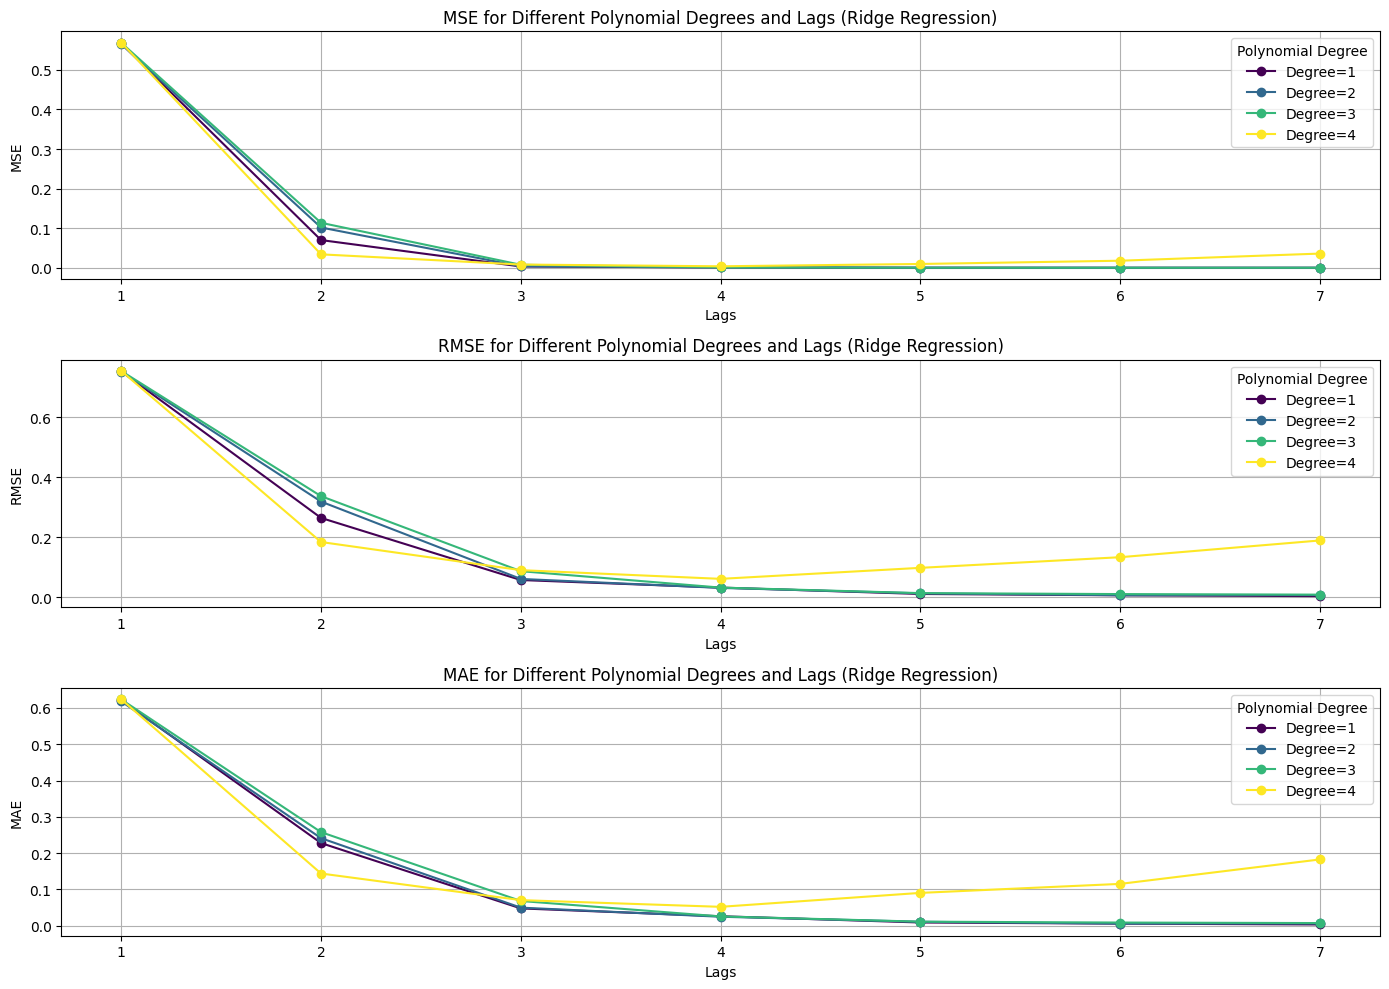

In [ ]:
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import GridSearchCV
import joblib

# Load the data
df = pd.read_csv('/content/drive/MyDrive/alphavantage/close_prices.csv', parse_dates=['Date'], index_col='Date')
df = df.sort_index()

# Apply Gaussian Smoothing
sigma = 3
df['Close_smoothed'] = gaussian_filter1d(df['Close'], sigma=sigma)

# Prepare to store results
results_list = []
# Define the range of alpha values for GridSearchCV
alpha_values = [0.01, 0.1, 1, 10, 100]

# Loop for lags from 1 to 7
for lags in range(1, 8):
    # Create lagged features
    df = df[['Close_smoothed']].copy()
    for i in range(1, lags + 1):
        df[f'close_t-{i}'] = df['Close_smoothed'].shift(i)

    df = df.dropna()

    # Split into training and validation sets
    train_data = df[df.index < '2024-01-01']
    validation_data = df[df.index >= '2024-01-01']

    # x: train, y:validation
    X_train = train_data[[f'close_t-{i}' for i in range(1, lags + 1)]].values
    y_train = train_data['Close_smoothed'].values
    X_validation = validation_data[[f'close_t-{i}' for i in range(1, lags + 1)]].values
    y_validation = validation_data['Close_smoothed'].values

    # Loop for polynomial degrees from 1 to 4
    for degree in range(1, 5):
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_validation_poly = poly.transform(X_validation)

        ridge = Ridge(max_iter=10000)
        param_grid = {'alpha': alpha_values}
        grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
        grid_search.fit(X_train_poly, y_train)

        # Get the best alpha
        best_alpha = grid_search.best_params_['alpha']

        # Train the final model with the best alpha
        best_model = Ridge(alpha=best_alpha, max_iter=10000)
        best_model.fit(X_train_poly, y_train)

        # Predict on the validation set
        validation_predictions = best_model.predict(X_validation_poly)

        # Evaluate the model
        validation_mse = mean_squared_error(y_validation, validation_predictions)
        validation_rmse = np.sqrt(validation_mse)
        validation_mae = mean_absolute_error(y_validation, validation_predictions)

        # Store results
        results_list.append({
            'lags': lags,
            'degree': degree,
            'best_alpha': best_alpha,
            'validation_mse': validation_mse,
            'validation_rmse': validation_rmse,
            'validation_mae': validation_mae
        })

        print(f"\n--- Lags: {lags}, Degree: {degree}, Best Alpha: {best_alpha} ---")
        print(f"Validation MSE: {validation_mse}")
        print(f"Validation RMSE: {validation_rmse}")
        print(f"Validation MAE: {validation_mae}")

        # Save the model
        if lags == 4 and degree == 3:
            joblib.dump(best_model, '/content/drive/MyDrive/alphavantage/ridge_model.pkl')


results_df = pd.DataFrame(results_list)

# Plot for MSE, RMSE, and MAE with lags on the x-axis
metrics = ['validation_mse', 'validation_rmse', 'validation_mae']
metric_labels = ['MSE', 'RMSE', 'MAE']

# Determine the number of polynomial degrees dynamically
unique_degrees = results_df['degree'].unique()
num_degrees = len(unique_degrees)

# Generate a colormap
colormap = cm.get_cmap('viridis', num_degrees)  # Use 'viridis' or any other colormap

plt.figure(figsize=(14, 10))

for idx, metric in enumerate(metrics):
    plt.subplot(3, 1, idx + 1)  # Create subplots for each metric
    for degree_idx, degree in enumerate(unique_degrees):  # Loop through unique polynomial degrees
        degree_df = results_df[results_df['degree'] == degree]
        color = colormap(degree_idx / num_degrees)  # Dynamically assign a color
        plt.plot(degree_df['lags'], degree_df[metric],
                 marker='o', linestyle='-', color=color,
                 label=f'Degree={degree}')
    plt.xlabel('Lags')
    plt.ylabel(metric_labels[idx])
    plt.title(f'{metric_labels[idx]} for Different Polynomial Degrees and Lags (Ridge Regression)')
    plt.legend(title="Polynomial Degree")
    plt.grid(True)

plt.tight_layout()
plt.show()


Με βάση τα γραφήματα, φαίνεται ότι οι μετρικές σφάλματος (MSE, RMSE και MAE) μειώνονται σημαντικά από το lag 1 έως το lag 2 και στη συνέχεια φθάνουν σε χαμηλές σχεδόν σταθερές τιμές από το lag 3 και μετά. Μετά το lag 4, τα σφάλματα μειώνονται ελάχιστα γεγονός που υποδηλώνει ότι τα πρόσθετα lag  πέραν αυτού του σημείου δεν παρέχουν ουσιαστική βελτίωση της ακρίβειας. Οπότε γι'αυτό και θα χρησιμοποιηθεί το μοντέλο που έχει 4 lag. Αυτά ισχύουν για βαθμό πολυωνύμου μέχρι 3 όταν ο βαθμός γίνει 4 φαίνεται να υπερπροσαρμόζεται (overfitting), καθώς εμφανίζει μεγαλύτερα σφάλματα για περισσότερα lags. Οπότε θα επιλέξουμε βαθμό πολυωνύμου 3.

In [ ]:
import joblib
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# Load the saved model
ridge_model = joblib.load('/content/drive/MyDrive/alphavantage/ridge_model.pkl')

# Prepare the features for prediction
recent_values = df['Close_smoothed'].iloc[-4:].values

# Create a vector for the input features
input_features = recent_values.reshape(1, -1)

# Transform the input features into Polynomial Features
poly = PolynomialFeatures(degree=3)
input_poly = poly.fit_transform(input_features)

#  Make the prediction
next_day_prediction = ridge_model.predict(input_poly)

# Print the prediction for the next day
print("Prediction for the next day:", next_day_prediction[0])


Prediction for the next day: 177.5717144706921
